In [1]:
import jax.numpy as jnp
from itertools import count
import jax.random as jr
import jax
import jax.scipy as jsci
from jax import jit,vmap, lax
import matplotlib.pyplot as plt
from utils import *
from plotting_utils import *
from LDS_utils import *
jax.config.update("jax_enable_x64", True)

keys = map(jr.PRNGKey, count())

In [2]:
D = 50
K1 = 3
K2 = 2
M = 2

S = 50 
T = 100

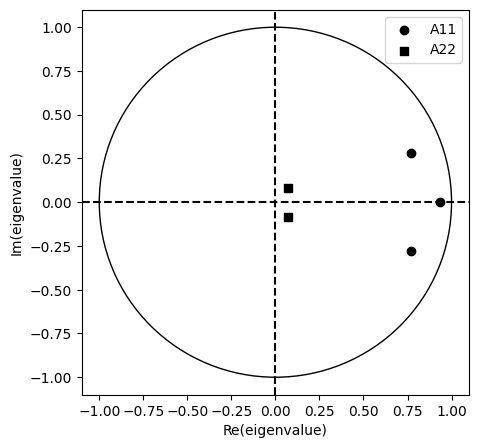

In [3]:
eigs1 = generate_eigenvalues(next(keys), K1, R=1, r=0.8)
eigs2 = generate_eigenvalues(next(keys), K2, R=0.3, r=0.1)

fig, axes = plt.subplots(figsize=(5,5))
plot_eigenvalues(axes, eigs1, eigs2, color='black', label=['A11','A22'], alpha=1)
axes.legend()



In [4]:
LDS = task_subspace_LDS.task_subspace_LDS(D, K1, K2, M)
trueA = LDS.generate_dynamics_matrix(next(keys), eigs1, eigs2)
trueu = LDS.generate_inputs(next(keys), S, T)
trueB, trueQ, truemu0, trueQ0, trueC, trued, trueR = LDS.generate_other_parameters(next(keys), trueA)

In [5]:
# checking that trueA has the desired eigenvalues
eigvals1 = jnp.linalg.eigvals(trueA[:K1,:K1])
eigvals2 = jnp.linalg.eigvals(trueA[K1:,K1:])

print(compare_as_sets(eigvals1, eigs1, tol=1e-12))
print(compare_as_sets(eigvals2, eigs2, tol=1e-12))
print(compare_as_sets(jnp.concatenate([eigvals1, eigvals2]), jnp.linalg.eigvals(trueA), tol=1e-12))


True
True
True


In [6]:
x_single, y_single = generate_latents_and_observations(next(keys), trueu[0], trueA, trueB, trueQ, truemu0, trueQ0, trueC, trued, trueR)

In [9]:
# whole sessions generation
generate_sessions = jit(vmap(generate_latents_and_observations, in_axes=(0,0,None,None,None,None,None,None,None,None)))


keys_batch = jr.split(next(keys), S)
x, y = generate_sessions(keys_batch, trueu, trueA, trueB, trueQ, truemu0, trueQ0, trueC, trued, trueR)

In [10]:
print(x.shape)
print(y.shape)

(50, 100, 5)
(50, 100, 50)
